In [2]:
# Add additional library
import sys, os
data_lib = os.path.abspath('../data')
eda_sp_lib = os.path.abspath('../signal_processing')
if data_lib not in sys.path:
    sys.path.append(data_lib)
if eda_sp_lib not in sys.path:
    sys.path.append(eda_sp_lib)


from data_utils import *
from visualisation_utils import *
import pywt
from sklearn.mixture import GaussianMixture
from eda_signal_processing import *
import scipy

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [3]:
EDA_SAMPLING_RATE = 4

dp_manager = get_data_path_manager()
wesad_wrist_metadata = load_metadata(dp_manager.WESAD_wrist_metadata_path)

In [4]:
DATASET_NAME = 'WESAD'
DEVICE = 'wrist'
SIGNAL_NAME = 'EDA'
USER_ID = 'S10'

In [5]:
raw_signal = load_raw_signal(dp_manager, DATASET_NAME, USER_ID, DEVICE, SIGNAL_NAME)
user_metadata = wesad_wrist_metadata[USER_ID]

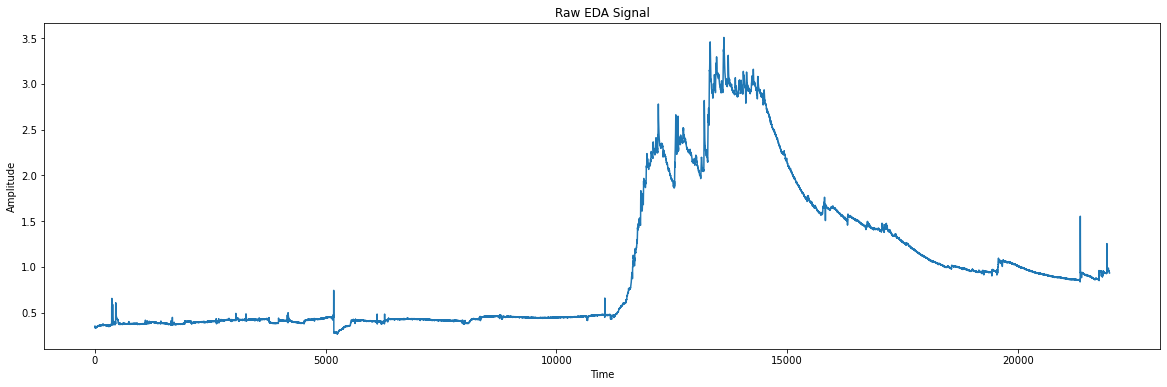

In [6]:
plot_signal(raw_signal, title = 'Raw EDA Signal')

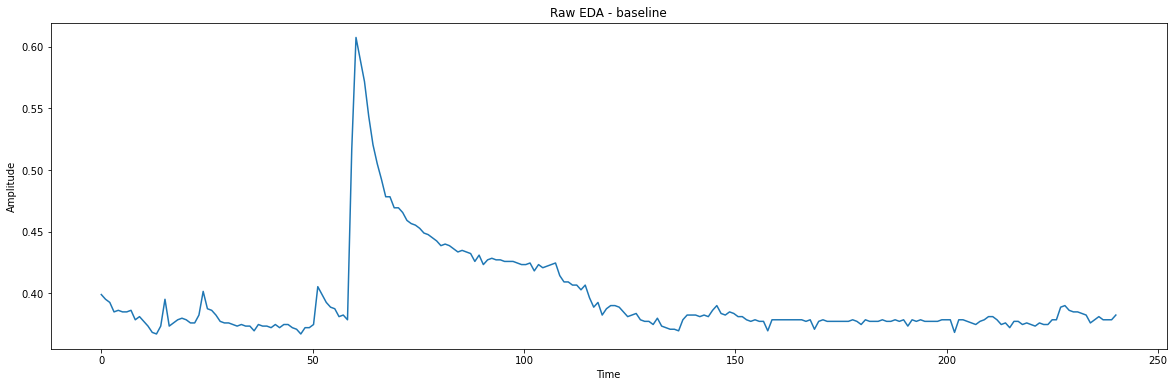

In [7]:
for i, label in enumerate(user_metadata['labels']):
    starting_index = user_metadata['eda']['starting_indices'][i]
    ending_index = user_metadata['eda']['ending_indices'][i]
    trim_indices = (starting_index, ending_index)
    trimmed_signal = get_trimmed_signal(raw_signal, trim_indices, lag = 60, sampling_rate = EDA_SAMPLING_RATE)
    title = f'Raw EDA - {label}'
    plot_signal(trimmed_signal[260:260 + EDA_SAMPLING_RATE * 60], title = title)
    break

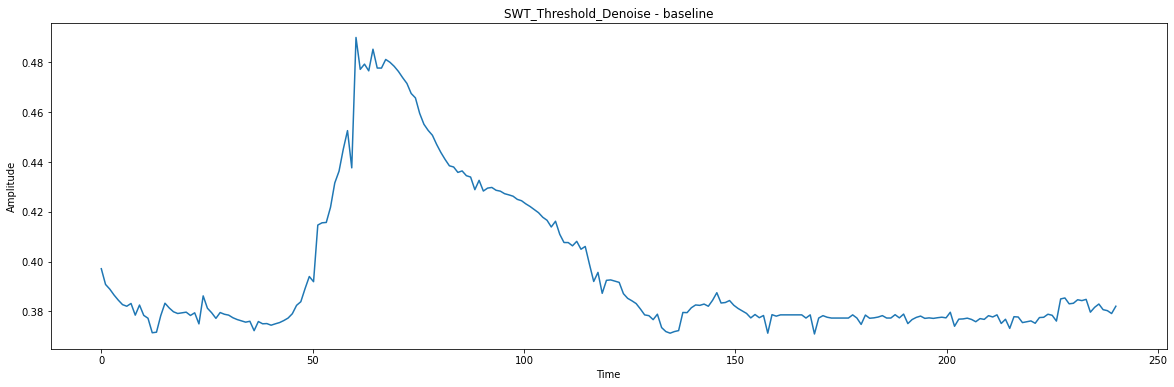

In [8]:
swt_denoiser = SWT_Threshold_Denoiser()
signal = swt_denoiser.denoise(trimmed_signal[260:260 + EDA_SAMPLING_RATE * 60])
plot_signal(signal, title = f'SWT_Threshold_Denoise - {label}')

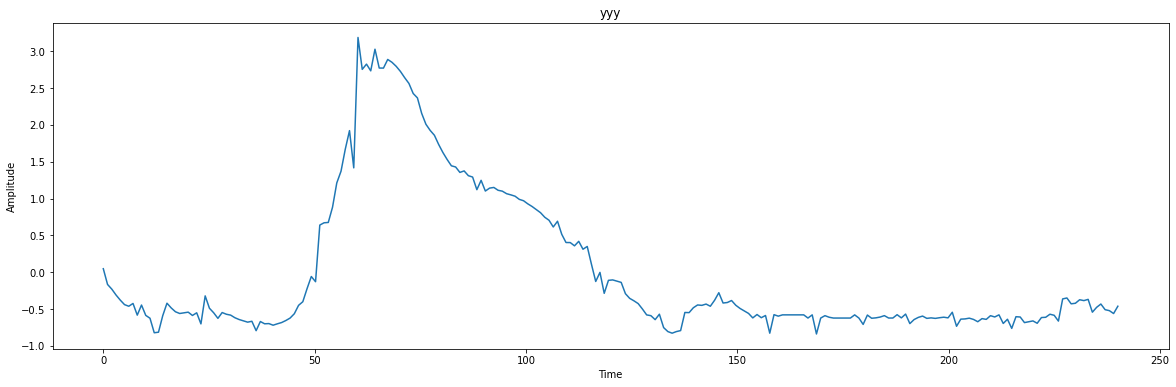

In [9]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaled_signal = StandardScaler().fit_transform(signal.reshape(-1, 1)).ravel()
plot_signal(scaled_signal, title = 'yyy')

In [10]:
eda_processor = EDA_Signal_Processor()
signals = eda_processor.eda_signal_processing(scaled_signal, EDA_SAMPLING_RATE)
signals

,EDA_Cleaned,EDA_Tonic,EDA_Phasic,SCR_Onsets,SCR_Peaks,SCR_Height,SCR_Amplitude,SCR_RiseTime,SCR_Recovery,SCR_RecoveryTime
0,0.047910,-0.040783,0.000000,0,0,0.0,0.0,0.0,0,0.0
1,-0.132233,-0.081773,0.000000,0,0,0.0,0.0,0.0,0,0.0
2,-0.248617,-0.124282,-0.123254,0,0,0.0,0.0,0.0,0,0.0
3,-0.317385,-0.168153,-0.146473,0,0,0.0,0.0,0.0,0,0.0
4,-0.376559,-0.213231,-0.155531,0,0,0.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
235,-0.458055,-0.994102,0.513070,0,0,0.0,0.0,0.0,0,0.0
236,-0.479883,-1.003674,0.510706,0,0,0.0,0.0,0.0,0,0.0
237,-0.540901,-1.013173,0.491045,0,0,0.0,0.0,0.0,0,0.0
238,-0.544549,-1.022581,0.495026,0,0,0.0,0.0,0.0,0,0.0


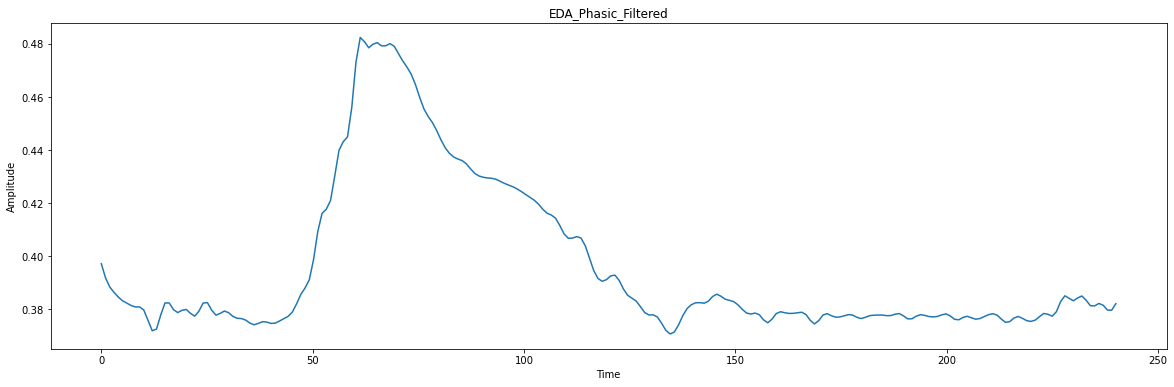

In [11]:
b, a = scipy.signal.butter(4, 1, 'low', fs = EDA_SAMPLING_RATE)
scaled_signal = scipy.signal.filtfilt(b, a, signal)
plot_signal(scaled_signal, title = 'EDA_Phasic_Filtered')

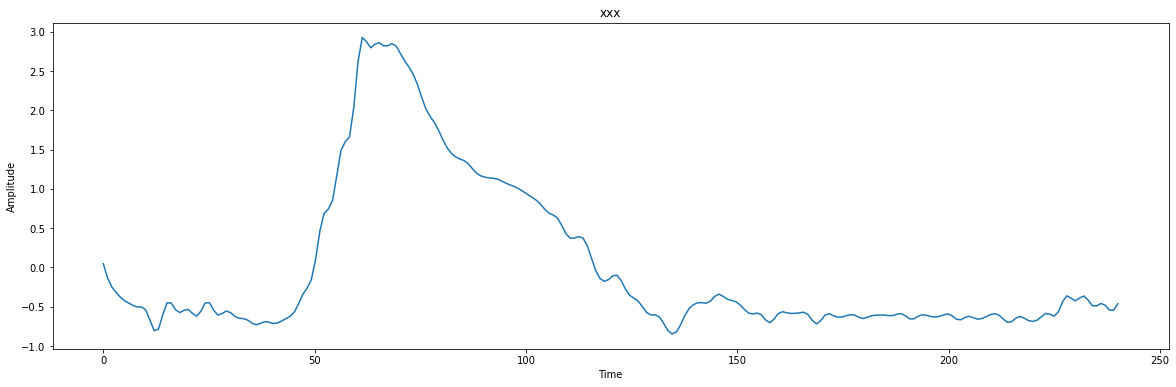

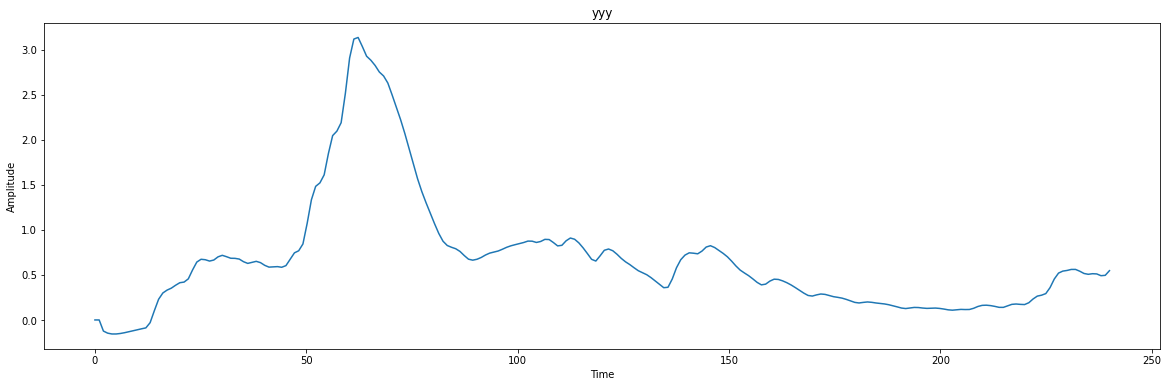

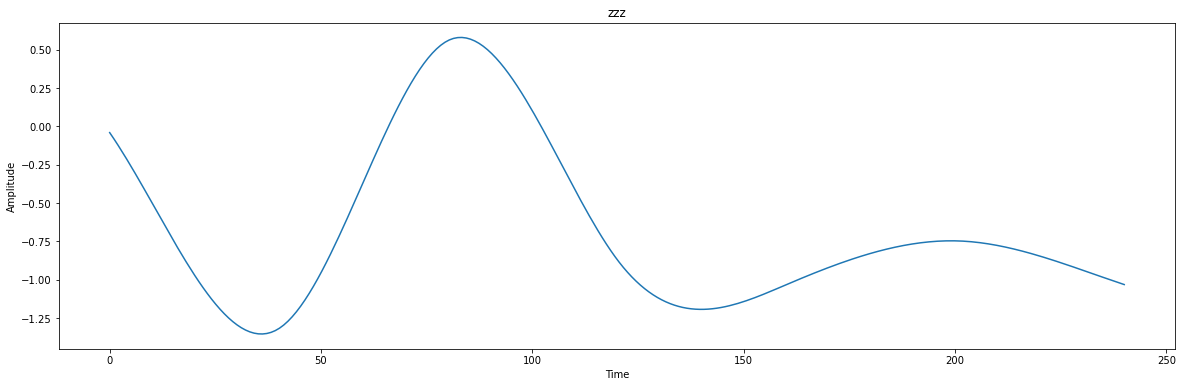

In [12]:
plot_signal(signals['EDA_Cleaned'], title = 'xxx')
plot_signal(signals['EDA_Phasic'], title = 'yyy')
plot_signal(signals['EDA_Tonic'], title = 'zzz')